In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
from scipy.stats import invwishart
from math import *

# TP 3: Hasting-Metropolis (and Gibbs) samplers


## Exercise 1: Hasting-Metropolis within Gibbs – Stochastic Approximation EM

### Question 1:

#### __Compute log likelihood__

$$\begin{align}
log(p(y,z,\theta)) &= log(p(y|z, \theta) * p(z|\theta) * p(\theta)) \\
&= log(p(y|z, \theta)) + log(p(z|\theta)) + log(p(\theta)) \\
&= log( \prod_{i=1}^N \prod_{j=1}^{K_i} p(y_{i,j} | z, \theta)) + log( p(z_{pop}|\theta) \prod_{i=1}^N p(z_i|\theta)) + log(p(\theta))\\
&=  \sum_{i=1}^N \sum_{j=1}^{K_i} log(p(y_{i,j} | z, \theta)) + log( p(z_{pop}|\theta)) +  \sum_{i=1}^N log(p(z_i|\theta)) + log(p(\theta))\\
\end{align}
$$



\

__Compute $log(p(y|z, \theta))$__:

 We know $d_i(t_{i,j})|z_i, \theta$, which is determined and not a r.v., and that $\epsilon_{i,j} \sim \mathcal{N}(0,\sigma)$. 

$$\begin{align}
log(p(y|z, \theta)) &= \sum_{i=1}^N \sum_{j=1}^{K_i} log(p(y_{i,j} | z, \theta)) \\
&= \sum_{i=1}^N \sum_{j=1}^{K_i} log(p(d_i(t_{i,j}) + ϵ_{i,j} | z, \theta)) \\
&= \sum_{i=1}^N \sum_{j=1}^{K_i} log(p(ϵ_{i,j}=y_{i,j} - d_i(t_{i,j})| z, \theta)) \\
&= \sum_{i=1}^N \sum_{j=1}^{K_i} log( \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{1}{2\sigma^2} ||y_{i,j} - d_i(t_{i,j})||^2}) \\
&= - \sum_{i=1}^NK_i log(\sigma\sqrt{2\pi}) - \sum_{i=1}^N \sum_{j=1}^{K_i}  \frac{||y_{i,j} - d_i(t_{i,j})||^2}{2\sigma^2} \\
&= S_1\phi_1 + \psi_1 \\
\end{align}
$$

\

__Compute $\sum_{i=1}^N log(p(z_i|\theta))$ :__

 we know that $\xi_i \sim \mathcal{N}(0,\sigma_{\xi})$ and $\tau_i \sim \mathcal{N}(0,\sigma_{\tau})$.

$$\begin{align}
\sum_{i=1}^N log(p(z_i|\theta)) &= \sum_{i=1}^N log(p(\xi_i, \tau_i |\theta))\\
&= -Nlog(2\pi\sigma_{\xi}\sigma_{\tau}) - \sum_{i=1}^N ( \frac{1}{2} \frac{\xi_i^2}{\sigma_{\xi}^2} + \frac{1}{2} \frac{\tau_i^2}{\sigma_{\tau}^2})\\
&= \psi_2 + \psi_3 + S_2 \phi_2 + S_3 \phi_3\\
\end{align}
$$

\

__Compute  $log( p(z_{pop}|\theta)) $ :__

We know that $v_0 \sim \mathcal{N}(\bar{v_0},\sigma_{v_0})$ and $t_0 \sim \mathcal{N}(\bar{t_0},\sigma_{t_0})$ 

$$\begin{align}
log( p(z_{pop}|\theta)) &= log(p(t_0, v_0 |\theta))\\
&=log(p(t_0|\theta))+log(p(v_0|\theta))\\
&= -log(2\pi\sigma_{v_0}\sigma_{t_0}) - \frac{||t_0-\bar{t_0}||^2}{2 \sigma_{t_0}^2} -\frac{||v_0-\bar{v_0}||^2}{2 \sigma_{v_0}^2} \\
&= S_4\phi_4 + \psi_5 + S_5\phi_5 + \psi_5  \\
\end{align}
$$

\


__Compute $log(p(\theta))$ :__

 We have $\theta=(\bar{t_0},\bar{v_0},\sigma_{\xi},\sigma_{\tau},\sigma)$, with $\bar{v_0} \sim \mathcal{N}(\bar{\bar{v_0}},s_{v_0})$ and $\bar{t_0} \sim \mathcal{N}(\bar{\bar{t_0}}, s_{t_0})$ and $\sigma_{\xi},\sigma_{\tau},\sigma$ follow a invere-Wishart distribution.

$$\begin{align}
log(p(\theta)) &= log(p(\bar{t_0},\bar{v_0},\sigma_{\xi},\sigma_{\tau},\sigma)) \\
&= log(p(\bar{t_0})) + log(p(\bar{v_0})) + log(p(\sigma_{\xi})) + log(p(\sigma_{\tau},\sigma)) \\
&= -log(2\pi s_{t_0} s_{v_0}) - \frac{||\bar{t_0}-\bar{\bar{t_0}}||^2}{2 s_{t_0}^2} - \frac{||\bar{v_0}-\bar{\bar{v_0}}||^2}{2 s_{v_0}^2} -(1+\frac{m_ξ}{2}) log (\sigma_ξ^2) - \frac{v_\xi^2}{2\sigma_ξ^2} -(1+\frac{m_τ}{2})log(\sigma_τ^2) - \frac{v_τ^2}{2\sigma_τ^2} -(1+\frac{m}{2}) log( \sigma^2) - \frac{v^2}{2\sigma^2} \\
&= \psi_6
\end{align}
$$

\

\


#### __The curved exponential family__

We want $log(p(y,z,\theta)) = < S(y,z),\phi(\theta) > + \psi(\theta) = \sum_{i=1}^5 S_i \phi_i  + \sum_{i=1}^6 \psi_i $. 


We define : 

$$N_{all} = \sum_{i=1}^N k_i$$

$$
\begin{align*}
S_1 &= \sum_{i=1}^N \sum_{j=1}^{K_i}  \frac{||y_{i,j} - d_i(t_{i,j})||^2}{N_{all}} & 
\phi_1 &= - \frac{N_{all}}{2\sigma ^2} \\
S_2 &= \frac{\sum_{i=1}^N \tau_i^2}{N} &
\phi_2 &= -\frac{N}{2 \sigma_{\tau}^2} \\
S_3 &= \frac{\sum_{i=1}^N \xi_i^2}{N} &
\phi_3 &= -\frac{N}{2 \sigma_{\xi}^2} \\
S_4 &= t_0 &
\phi_4 &= - \frac{\bar{t_0}}{2\sigma_{t_0}^2}\\
S_5 &= v_0 &
\phi_5 &= - \frac{\bar{v_0}}{2\sigma_{v_0}^2}\\
\end{align*}
$$


Then, 
$$
\begin{align*}
\psi_1 &= − N_{all}log(σ  \sqrt{2\pi})\\
\psi_2 &= -Nlog(\sqrt{2\pi}\sigma_{\tau}) \\
\psi_3 &= -Nlog(\sqrt{2\pi}\sigma_{\xi}) \\
\psi_4 &= -log(\sqrt{2\pi}\sigma_{t_0}) \\
\psi_5 &= -log(\sqrt{2\pi}\sigma_{v_0}) \\
\psi_6 &= -log(2\pi s_{t_0} s_{v_0}) - \frac{||\bar{t_0}-\bar{\bar{t_0}}||^2}{2 s_{t_0}^2} - \frac{||\bar{v_0}-\bar{\bar{v_0}}||^2}{2 s_{v_0}^2} -(1+\frac{m_ξ}{2}) log (\sigma_ξ^2) - \frac{v_\xi^2}{2\sigma_ξ^2} -(1+\frac{m_τ}{2})log(\sigma_τ^2) - \frac{v_τ^2}{2\sigma_τ^2} -(1+\frac{m}{2}) log( \sigma^2) - \frac{v^2}{2\sigma^2} \\
\end{align*}
$$


### Question 2

In [7]:
## Functions

def d(t, p, v, t0):
    """Compute trajectory"""
    return p + v * (t - t0)

def inverse_wishart(v, m, size):
    """Compute samples from inverse-Whishart distribution
    Input :
    v : scale
    m : degree of freedom
    size : nb of samples expected
    """
    rv = scipy.stats.invwishart( df = m, scale = v)
    return rv.rvs(size)

def normal(mu, sig, size):
    """Compute samples from normal distribution
    Input :
    mu : mean
    sig : variance
    size : nb of samples expected
    """
    rv = scipy.stats.norm(loc = mu, scale = sig)
    return rv.rvs(size)

def time(lenght):
    """Simulate the time of measurements"""
    rv = scipy.stats.gamma(1)
    T = rv.rvs(lenght)
    T = np.cumsum(T)
    return T

def generate_data(N, k, other_parameters):
    """Generate data from the model"""

    p0, sig_t0, sig_v0, s_t0, s_v0, t0_bbar, v0_bbar, m, v, m_xi, v_xi, m_tau, v_tau = other_parameters

    t0_bar = normal(t0_bbar, s_t0, 1)[0]
    v0_bar = normal(v0_bbar, s_v0, 1)[0]
    t0 = normal(t0_bar, sig_t0, 1)[0]
    v0 = normal(v0_bar, sig_v0, 1)[0]
    sig = np.sqrt(inverse_wishart(v, m, 1))
    sig_xi = np.sqrt(inverse_wishart(v_xi, m_xi, 1))
    sig_tau = np.sqrt(inverse_wishart(v_tau, m_tau, 1))

    theta = [t0_bar, v0_bar, sig, sig_xi, sig_tau]
    data = []
    T = []
    xi = []
    tau = []
  
    for i in range(N):
      eps = normal(0, sig, k[i])
      tau.append(normal(0, sig_tau, 1)[0])
      xi.append(normal(0, sig_xi, 1)[0])
      alpha = np.exp(xi[i])
      y = []
      t = time(k[i])
      for j in range(k[i]):
        t_ = alpha*(t[j] - t0 - tau[i]) + t0
        y.append(d(t_, p0, v0, t0) + eps[j])
      data.append(y)
      T.append(t)
    
    z = [t0, v0, xi, tau]
    return data, T, theta, z



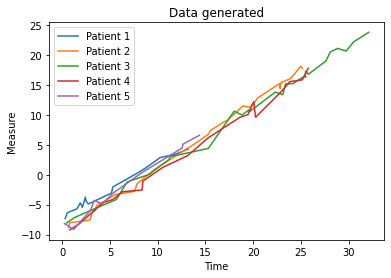

In [8]:
## Parameters
N = 5
k = [15, 26, 30, 20, 10]
p0 = 5
sig_t0 = 0.1
sig_v0 = 0.2 
t0_bbar = 2
v0_bbar = 3
s_t0 = 5
s_v0 = 5
m_xi = 2
v_xi = .1
m_tau = 2
v_tau = .2
m = 3 
v = .1
params = [p0, sig_t0, sig_v0, s_t0, s_v0, t0_bbar, v0_bbar, m, v, m_xi, v_xi, m_tau, v_tau]


### Test
data, T, theta, z = generate_data(N, k, params)
for i in range(N):
    plt.plot(T[i], data[i], label='Patient '+str(i+1))
    plt.xlabel('Time')
    plt.ylabel('Measure')
    plt.title('Data generated')
    plt.legend()

### Question 3

In [9]:
from numpy.core.numeric import zeros_like
def compute_N_all(elmt):
    """ Give the total number of observations in the data
    Input
      elmt : object of the same size of y and T
    Output:
      sum : total number of observations"""
    sum = 0
    for i in range(len(elmt)):
        sum += len(elmt[i])
    return sum


def log_likelihood(y, T, z, theta, other_parameters):
    """Compute the log likelihood defined in question 1
    Input :
      y : the observations
      T : recording of the time
      z : t0, v0, xi, tau
      theta : t0_bar, v0_bar, sigma_xi, sigma_tau, sigma
      other_parameters : rest of the parameters 
    Output :
      log_like : log likelihood"""
    # Parameters
    log_like = 0
    N_all = compute_N_all(y)
    N = len(y)
    t0, v0, xi, tau = z
    t0_bar, v0_bar, sig_xi, sig_tau, sig = theta
    p0, sig_t0, sig_v0, s_t0, s_v0, t0_bbar, v0_bbar, m, v, m_xi, v_xi, m_tau, v_tau = other_parameters

    # Compute log q(y|z,theta)
    log_like += N_all * np.log(sig*np.sqrt(2*np.pi))
    for i in range(N):
        t = np.exp(xi[i])*(T[i] - t0 - tau[i]) + t0
        preds = d(t, p0, v0, t0)
        log_like += -np.sum( np.square(y[i]-preds)/(2 * sig**2))

    # Compute ∑Ni=1log(p(zi|θ)) 
    log_like += -np.sum(tau**2)/ (2*sig_tau**2) - np.sum(xi**2)/ (2*sig_xi**2) - len(y) * np.log(2*np.pi*sig_xi*sig_tau)

    # Compute log(p(zpop|θ))
    log_like += - (t0 - t0_bar)**2/(2*sig_t0**2) - (v0 - v0_bar)**2/(2*sig_v0**2) -len(y)*(np.log(2*np.pi*sig_v0*sig_t0)) 

    # Compute p(θ)
    log_like  += - (t0_bar -t0_bbar)**2/(2*s_t0**2) - (v0_bar -v0_bbar)**2/(2*sig_v0**2) - np.log(2*np.pi*s_t0*s_v0)
    log_like  += -(1 + m/2)*np.log(sig**2) - v**2/(2*sig**2) -(1 + m_xi/2)*np.log(sig_xi**2) - v_xi**2/(2*sig_xi**2)-(1 + m_tau/2)*np.log(sig_tau**2) - v_tau**2/(2*sig_tau**2)
    
    return log_like


def estimate_z(t0_bar, sig_t0, v0_bar, sig_v0, xi, sig_xi, tau, sig_tau):
    """Sample latent variables follogwing normal distributions"""
    t0 = normal(t0_bar, sig_t0, 1)
    v0 = normal(v0_bar, sig_v0, 1)
    xi = np.array([normal(x, sig_xi, 1) for x in xi])
    tau = np.array([normal(x, sig_tau, 1) for x in tau])
    return t0, v0, xi, tau

def step_MH(y, T, theta, previous_z, other_parameters):
    """ Compute one step of the Hasting-Metropolis Sampler
    Input :
      y : the observations
      T : recording of the time
      previous : the latent variable t0, v0, xi, tau
      theta : t0_bar, v0_bar, sigma_xi, sigma_tau, sigma
      other_parameters : rest of the parameters 
    Output :
      log_step : log likelihood computed at this step
      update : the updated latent variable"""
    t0, v0, xi, tau = previous_z
    t0_bar, v0_bar, sig_xi, sig_tau, sig = theta

    # proposal
    t0_prop, v0_prop, xi_prop, tau_prop = estimate_z(t0_bar, sig_t0, v0_bar, sig_v0, xi, sig_xi, tau, sig_tau)

    #acceptance-rejection
    log_step = log_likelihood(y, T, previous_z, theta, other_parameters)
    alpha = min(0, (log_likelihood(y, T, [t0_prop, v0_prop, xi_prop, tau_prop], theta, other_parameters) - log_step)[0])
    u = np.log(np.random.uniform())

    #acceptance
    if u <= alpha:
        #print("Accepted")
        update_z = t0_prop, v0_prop, xi_prop, tau_prop
    else:
        #print("Rejected")
        update_z = previous_z

    return log_step, update_z


def MH_sampler(y, T, theta, other_parameters, init = None, maxIter=12):
    """Sample with Hasting-Metropolis
    Input :
      y : the observations
      T : recording of the time
      theta : t0_bar, v0_bar, sigma_xi, sigma_tau, sigma
      init : inititation for the latent variable t0, v0, xi, tau
      other_parameters : rest of the parameters
    Output :
      log_likelihoods : list of log likelihood computed at each step
      z: the estimated latent variable
      """
    N = len(y)
    if init is None:
        t0 = 0
        v0 = 1
        xi = np.zeros((N,1))
        tau = np.random.normal(size = (N,1))
        z = [t0, v0, xi, tau]
    else:
        z = init
    
    log_likelihoods = []
    for i in range(maxIter):
        log_step, z = step_MH(y, T, theta, z, other_parameters)
        log_likelihoods.append(log_step)
    
    return log_likelihoods, z

Error in approximation of z [6.05351287]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


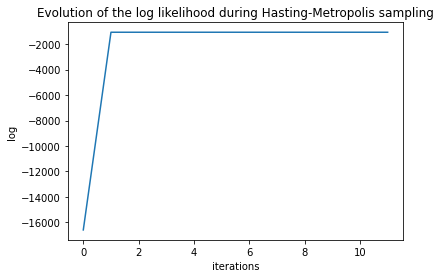

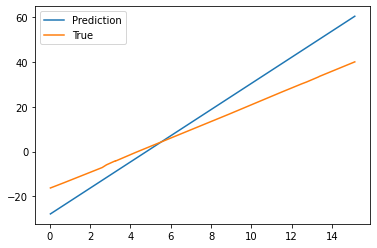

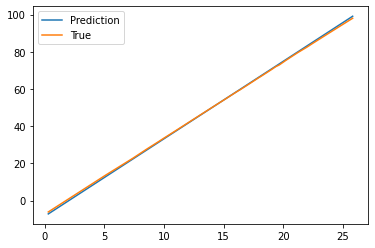

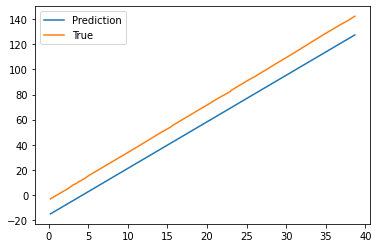

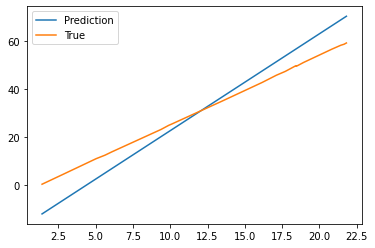

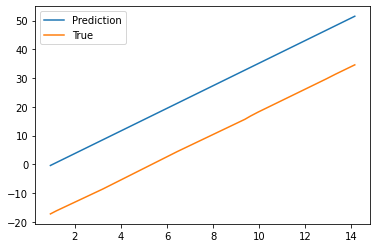

In [10]:
# Test

# Generate data
params = [p0, sig_t0, sig_v0, s_t0, s_v0, t0_bbar, v0_bbar, m, v, m_xi, v_xi, m_tau, v_tau]
data, T, theta, z_true = generate_data(N, k, params)
t0_bar, v0_bar, sig_xi, sig_tau, sig = theta

# Metropolis Hating Sampler
log_likelihoods, z_approx = MH_sampler(data, T, theta, params)
t0, v0, xi, tau = z_approx

# Compute error on z
error = np.sqrt((z_true[0] - z_approx[0])**2 + (z_true[1] - z_approx[1])**2 + np.sum([(z_true[2][i] - z_approx[2][i])**2 for i in range(N)]) + np.sum([(z_true[3][i] - z_approx[3][i])**2 for i in range(N)]))
print("Error in approximation of z", error)

# Plot log likelihood evolution
plt.plot(np.arange(len(log_likelihoods)), log_likelihoods)
plt.xlabel('iterations')
plt.ylabel('log')
plt.title('Evolution of the log likelihood during Hasting-Metropolis sampling')
plt.show()

# plot results
for i in range(N):
  pred = d(np.exp(xi[i])*(T[i]-t0-tau[i])+t0,p0,v0,t0)
  plt.plot(T[i], pred, label = "Prediction")
  plt.plot(T[i], data[i], label = "True")
  plt.legend()
  plt.show()

### Question 4




Let's note $Q(\theta) = < S(y,z),\phi(\theta) > + \psi(\theta)$. 
We want to find optimal parameters of $Q$, $\theta^* = (\bar{t_0}^*, \bar{v_0}^*, \xi^*, \tau^*)$ and we suppose that the function is convex and admit one maximum. 

$\nabla_{\bar{t_0}} Q(\theta^*) = (t_0 - \bar{t_0}^* )/(2\sigma_{t_0}^2)  -(\bar{t_0}^* -  \bar{\bar{t_0}})/(2s_{t_0}^2) = 0$

Therefore, $\bar{t_0}^* = \frac{ \bar{\bar{t_0}}/s_{t_0}^2 + t_0 /\sigma_{t_0}^2}{1/\sigma_{t_0}^2 + 1/s_{t_0}^2}$.

By symmetry, $\bar{v_0} = \frac{ \bar{\bar{v_0}}/s_{v_0}^2 + v_0/\sigma_{v_0}^2}{1/\sigma_{v_0}^2 + 1/s_{v_0}^2}$.

Then,
$\nabla_{\sigma^2} Q(\theta^*) = S_1 N_{all}/ (\sigma^*)^3 - N_{all}/\sigma^* -(2+m)/ \sigma^* + v^2/ (\sigma^*)^3 = 0$

That is $\sigma* = \sqrt{\frac{S_1 N_{all} + v^2}{N_{all} + 2 + m}}$.

By symmetry we have, $\sigma_\tau^* = \sqrt{\frac{S_2 N + v_\tau^2}{N + 2 + m_\tau}}$
and $\sigma_\xi^* = \sqrt{\frac{S_3 N + v_\xi^2}{N + 2 + m_\xi}}$

with 
$$
\begin{align*}
S_1 &= \sum_{i=1}^N \sum_{j=1}^{K_i}  \frac{||y_{i,j} - d_i(t_{i,j})||^2}{N_{all}} \\
S_2 &= \frac{\sum_{i=1}^N \tau_i^2}{N} \\
S_3 &= \frac{\sum_{i=1}^N \xi_i^2}{N}
\end{align*}
$$


In [11]:

def step_MCMC_SAEM(y, T, theta, S, other_parameters, eps):
    """ Compute one step of the MCMC_SAEM
    Input :
      y : the observations
      T : recording of the time
      S : previous values of S1,2,3,4,5
      theta : t0_bar, v0_bar, sigma_xi, sigma_tau, sigma
      other_parameters : rest of the parameters 
      eps : coefficient of approximation
    Output :
      z : estimation of t0, v0, xi, tau 
      theta : new estimated value of theta (t0_bar, v0_bar, sigma_xi, sigma_tau, sigma)
      S : new approximation of S1,2,3,4,5 """
    # Parameters
    N = len(y)
    N_all = compute_N_all(y)
    t0_bar, v0_bar, sig_xi, sig_tau, sig = theta
    S1, S2, S3, S4, S5 = S
    p0, sig_t0, sig_v0, s_t0, s_v0, t0_bbar, v0_bbar, m, v, m_xi, v_xi, m_tau, v_tau = other_parameters

    # Simulation
    _ , z = MH_sampler(y, T, theta, other_parameters)
    t0, v0, xi, tau = z

    # Stochastic Approximation
    update_S1 = 0 
    for i in range(N):
      update_S1 += np.sum(np.square(y[i] - d(np.exp(xi[i])*(T[i]-t0-tau[i])+t0,p0,v0,t0))) / N_all
    S1 = S1  + eps * (update_S1 - S1)
    S2 = S2 + eps * (np.mean(np.square(tau)) - S2)
    S3 = S3 + eps * (np.mean(np.square(xi)) - S3)
    S4 = S4 + eps * (t0 - S4)
    S5 = S5 + eps * (v0 - S5)
    S = [S1, S2, S3, S4, S5]

    # Maximization
    t0_bar = (t0_bbar/(s_t0**2) + S4/(sig_t0**2)) / (1/(sig_t0**2) + 1/(s_t0**2))
    v0_bar = (v0_bbar/(s_v0**2) + S5/(sig_v0**2)) / (1/(sig_v0**2) + 1/(s_v0**2))
    sig = np.sqrt((N_all*S1 + v**2) / (N_all+2+m))
    sig_tau = np.sqrt((N*S2 + v_tau**2) / (N+2+m_tau))
    sig_xi = np.sqrt((N*S3 + v_xi**2) / (N+2+m_xi))
    theta = [t0_bar, v0_bar, sig_xi, sig_tau, sig]

    return z, theta, S

def MCMC_SAEM(y, T, other_parameters, theta_init=None, maxIter2=1000, delta=0.95):
    """ Compute MCMC_SAEM
    Input :
      y : the observations
      T : recording of the time
      other_parameters : rest of the parameters
    Output :
      theta, z : last estimations of theta and the latent variables"""
    # Initialisation
    N = len(y)
    S = np.zeros(5)
    eps = 1

    # Init theta
    if theta_init is None :
        theta = [0, 1, 0.5, 0.5, 0.5]
    else :
        theta = theta_init

    # MCMC-SAEM steps
    for i in range(maxIter2):
        eps = eps * delta
        z, theta, S = step_MCMC_SAEM(y, T, theta, S, other_parameters, eps)
    
    return theta, z

Error in approximation of z [9.59866229]
Error in approximation of theta [13.95528812]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


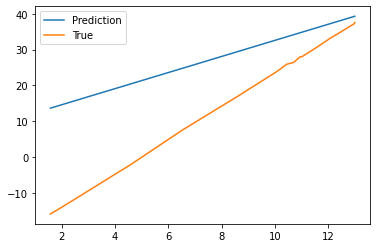

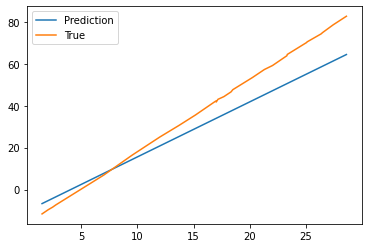

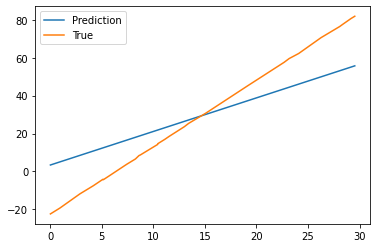

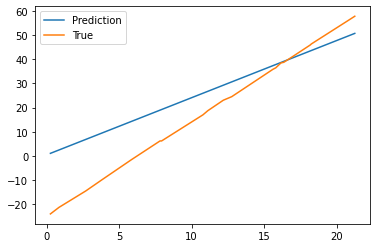

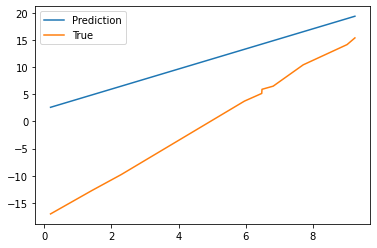

In [12]:
# Test 

# Generate data
params = [p0, sig_t0, sig_v0, s_t0, s_v0, t0_bbar, v0_bbar, m, v, m_xi, v_xi, m_tau, v_tau]
data, T, theta_true, z_true = generate_data(N, k, params)

# Compute MCMC-SAEM
theta_approx, z_approx = MCMC_SAEM(data, T, params)
t0_bar, v0_bar, sig_xi, sig_tau, sig = theta_approx
t0, v0, xi, tau = z_approx

# Compute errors
error = np.sqrt((z_true[0] - z_approx[0])**2 + (z_true[1] - z_approx[1])**2 + np.sum([(z_true[2][i] - z_approx[2][i])**2 for i in range(N)]) + np.sum([(z_true[3][i] - z_approx[3][i])**2 for i in range(N)]))
print("Error in approximation of z", error)
error = np.sqrt(np.sum([(theta_true[i]-theta_approx[i])**2 for i in range(len(theta_true))]))
print('Error in approximation of theta', error)

# plot results
for i in range(N):
  pred = d(np.exp(xi[i])*(T[i]-t0-tau[i])+t0,p0,v0,t0)
  plt.plot(T[i], pred, label = "Prediction")
  plt.plot(T[i], data[i], label = "True")
  plt.legend()
  plt.show()


### Question 5 & 6 


We have $ z = (t_0, v_0, \xi_i, \tau_i)_{i\in 1,...,N} = (z_1, ..., z_{2N+2}) $ with $z_1 = t_0, z_2= v_0, \forall l \in 3,...,N+2, z_{l} = \xi_{l-2}$ and $\forall l \in N+2,...,2N+2, z_{l}=\tau_{l-N-2}$.
Then we use the following adapted version of the  algorithm 2 :

---
Given data y and intial guess $\theta^{(0)}$

__Initialization :__ $z^{(0)} = 0, S^{(0)} = 0, (\epsilon_k)_{k>0}$

__for k = 0 to maxIter do :__

__Simulation :__ $\forall l\in 1,...2N+2, z_l^{(k+1)} \sim q(.|y, \theta^{(k)}, z_1^{(k+1)}, ... z_{l-1}^{(k+1)}, z_{l+1}^{(k)}, ... z_{2N+2}^{(k)} )$ sampled with a Metropolis-Hastings within Gibbs sampler. 


__Stochastic Approximation :__ $S^{(k+1)} = S^{(k)} + \epsilon_k (S(y, z^{(k+1)} ) − S^{(k)})$\

__Maximization :__ $\theta^{(k+1)} = argmax (− \psi(\theta^{(k)}) + S^{(k+1)} \phi(\theta^{(k)} )$\

__end for__

----

The Metropolis-Hastings within Gibbs sampler is defined as proposed, we use algorithm 3 and we replace $(*)$ with a Metropolis-Hastings step.

### Question 7

In [25]:
def estimate_xi_or_tau(variable, sig_variable, index):
    """Sample latent variables follogwing normal distributions"""
    sample = normal(variable[index], sig_variable, 1) 
    return sample

def estimate_t_or_v(variable_bar, sig_variable):
    """Sample t0 or v0 (one latent variable) follogwing normal distributions"""
    sample = normal(variable_bar, sig_variable, 1)
    return sample

def estimate_z_MHwG(l_step, previous_z, t0_bar, sig_t0, v0_bar, sig_v0, sig_xi, sig_tau):
    """sample new z from previous z changing only z_l_step"""
    t0, v0, xi, tau = previous_z
    N = len(xi)
    if l_step==1:
        t0 = estimate_t_or_v(t0_bar, sig_t0)
    elif l_step==2:
        v0 = estimate_t_or_v(v0_bar, sig_v0)
    elif 2<l_step<=N+2:
        xi[l_step - 3] = estimate_xi_or_tau(xi, sig_xi, l_step - 3)
    elif N+2<l_step<=2*N+2:
        tau[l_step - 3 - N] = estimate_xi_or_tau(tau, sig_tau, l_step - 3 - N)
    return [t0, v0, xi, tau]


def step_MHwG(l_step, y, T, theta, previous_z, other_parameters):
    """ Compute one step of the Hasting-Metropolis within Gibbs Sampler
    Input :
      l_step : dimension of z, z_l, that we are sampling
      y : the observations
      T : recording of the time
      previous : the latent variable t0, v0, xi, tau
      theta : t0_bar, v0_bar, sigma_xi, sigma_tau, sigma
      other_parameters : rest of the parameters 
    Output :
      log_step : log likelihood computed at this step
      update : the updated latent variable"""
    t0, v0, xi, tau = previous_z
    t0_bar, v0_bar, sig_xi, sig_tau, sig = theta
    p0, sig_t0, sig_v0, s_t0, s_v0, t0_bbar, v0_bbar, m, v, m_xi, v_xi, m_tau, v_tau = other_parameters

    # proposal
    t0_prop, v0_prop, xi_prop, tau_prop = estimate_z_MHwG(l_step, previous_z, t0_bar, sig_t0, v0_bar, sig_v0, sig_xi, sig_tau)

    # acceptance-rejection
    log_step = log_likelihood(y, T, previous_z, theta, other_parameters)
    alpha = min(0, (log_likelihood(y, T, [t0_prop, v0_prop, xi_prop, tau_prop], theta, other_parameters) - log_step)[0])
    u = np.log(np.random.uniform())

    # acceptance
    if u <= alpha:
        #print("Accepted")
        update_z = t0_prop, v0_prop, xi_prop, tau_prop
    else:
        #print("Rejected")
        update_z = previous_z

    return log_step, update_z


def MHwG_sampler(y, T, theta, other_parameters, init = None, maxIter=12):
    """Sample with Hasting-Metropolis within Gibbs
    Input :
      y : the observations
      T : recording of the time
      theta : t0_bar, v0_bar, sigma_xi, sigma_tau, sigma
      init : inititation for the latent variable t0, v0, xi, tau
      other_parameters : rest of the parameters
    Output :
      log_likelihoods : list of log likelihood computed at each step
      z: the estimated latent variable
      """
    N = len(y)
    if init is None:
        t0 = 0
        v0 = 1
        xi = np.zeros((N,1))
        tau = np.random.normal(size = (N,1))
        z = [t0, v0, xi, tau]
    else:
        z = init
    
    log_likelihoods = []
    for i in range(maxIter):
        for l_step in range(1, 2*N+3):
            log_step, z = step_MHwG(l_step, y, T, theta, z, other_parameters)
            log_likelihoods.append(log_step)
    
    return log_likelihoods, z

In [26]:

def step_MCMC_SAEM_with_MHwG_sampler(y, T, theta, S, other_parameters, eps):
    """ Compute one step of the MCMC_SAEM_with_MHwG_sampler
    Input :
      y : the observations
      T : recording of the time
      S : previous values of S1,2,3,4,5
      theta : t0_bar, v0_bar, sigma_xi, sigma_tau, sigma
      other_parameters : rest of the parameters 
      eps : coefficient of approximation
    Output :
      z : estimation of t0, v0, xi, tau 
      theta : new estimated value of theta (t0_bar, v0_bar, sigma_xi, sigma_tau, sigma)
      S : new approximation of S1,2,3,4,5 """
    # Parameters
    N = len(y)
    N_all = compute_N_all(y)
    t0_bar, v0_bar, sig_xi, sig_tau, sig = theta
    S1, S2, S3, S4, S5 = S
    p0, sig_t0, sig_v0, s_t0, s_v0, t0_bbar, v0_bbar, m, v, m_xi, v_xi, m_tau, v_tau = other_parameters

    # Simulation
    _ , z = MHwG_sampler(y, T, theta, other_parameters)
    t0, v0, xi, tau = z

    # Stochastic Approximation
    update_S1 = 0 
    for i in range(N):
      update_S1 += np.sum(np.square(y[i] - d(np.exp(xi[i])*(T[i]-t0-tau[i])+t0,p0,v0,t0))) / N_all
    S1 = S1  + eps * (update_S1 - S1)
    S2 = S2 + eps * (np.mean(np.square(tau)) - S2)
    S3 = S3 + eps * (np.mean(np.square(xi)) - S3)
    S4 = S4 + eps * (t0 - S4)
    S5 = S5 + eps * (v0 - S5)
    S = [S1, S2, S3, S4, S5]

    # Maximization
    t0_bar = (t0_bbar/(s_t0**2) + S4/(sig_t0**2)) / (1/(sig_t0**2) + 1/(s_t0**2))
    v0_bar = (v0_bbar/(s_v0**2) + S5/(sig_v0**2)) / (1/(sig_v0**2) + 1/(s_v0**2))
    sig = np.sqrt((N_all*S1 + v**2) / (N_all+2+m))
    sig_tau = np.sqrt((N*S2 + v_tau**2) / (N+2+m_tau))
    sig_xi = np.sqrt((N*S3 + v_xi**2) / (N+2+m_xi))
    theta = [t0_bar, v0_bar, sig_xi, sig_tau, sig]

    return z, theta, S

def MCMC_SAEM_with_MHwG_sampler(y, T, other_parameters, theta_init=None, maxIter2=1000, delta=0.95):
    """ Compute MCMC_SAEM_with_MHwG_sampler
    Input :
      y : the observations
      T : recording of the time
      other_parameters : rest of the parameters
    Output :
      theta, z : last estimations of theta and the latent variables"""
    # Initialisation
    N = len(y)
    S = np.zeros(5)
    eps = 1

    # Init theta
    if theta_init is None :
        theta = [0, 1, 0.5, 0.5, 0.5]
    else :
        theta = theta_init

    # MCMC-SAEM steps
    for i in range(maxIter2):
        eps = eps * delta
        z, theta, S = step_MCMC_SAEM_with_MHwG_sampler(y, T, theta, S, other_parameters, eps)
    
    return theta, z

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


Error in approximation of z [2.94360621e+12]
Error in approximation of theta [nan]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


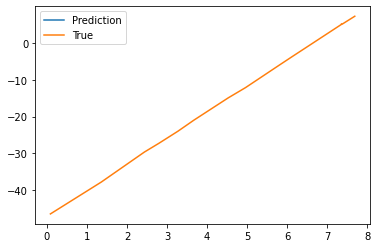

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


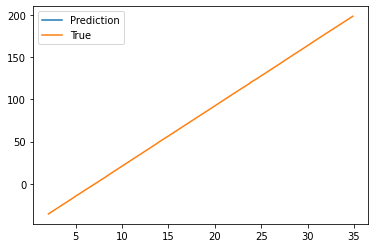

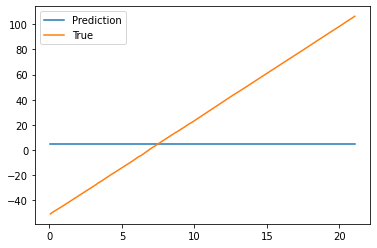

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


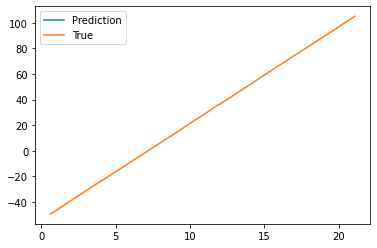

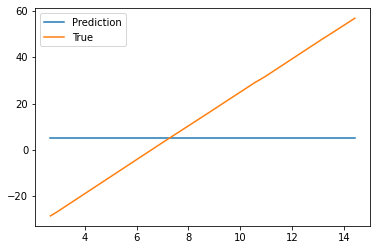

In [27]:
# Test 

# Generate data
params = [p0, sig_t0, sig_v0, s_t0, s_v0, t0_bbar, v0_bbar, m, v, m_xi, v_xi, m_tau, v_tau]
data, T, theta_true, z_true = generate_data(N, k, params)

# Compute MCMC-SAEM
theta_approx, z_approx = MCMC_SAEM_with_MHwG_sampler(data, T, params)
t0_bar, v0_bar, sig_xi, sig_tau, sig = theta_approx
t0, v0, xi, tau = z_approx

# Compute errors
error = np.sqrt((z_true[0] - z_approx[0])**2 + (z_true[1] - z_approx[1])**2 + np.sum([(z_true[2][i] - z_approx[2][i])**2 for i in range(N)]) + np.sum([(z_true[3][i] - z_approx[3][i])**2 for i in range(N)]))
print("Error in approximation of z", error)
error = np.sqrt(np.sum([(theta_true[i]-theta_approx[i])**2 for i in range(len(theta_true))]))
print('Error in approximation of theta', error)

# plot results
for i in range(N):
  pred = d(np.exp(xi[i])*(T[i]-t0-tau[i])+t0,p0,v0,t0)
  plt.plot(T[i], pred, label = "Prediction")
  plt.plot(T[i], data[i], label = "True")
  plt.legend()
  plt.show()

The only bad results is when an overflow is encountered in calculation. 

### Question 8

A Block Gibbs sampler is better for our model because it is much faster. Indeed updating parameters by block is less time-consuming than sampling and computing each varaiable one at a time. 


## Exercise 3 : Data augmentation



### Question 1

At each step of the algorithm 4, $(X_n,Y_n)$ only depends from $Y_{n-1}$. 
Indeed, $\forall n\in 1,...,N, X_n \sim f_{X|Y}(., Y_{n-1}), Y_n \sim f_{Y|X}(X_n,.)$.Therefore the bivariate process defines a Markov chain.

We have $P((X_n,Y_n)\in A|(X_{n-1}, Y_{n-1})) = \int_{A_y}\int_{A_x}  f_{X|Y}(x, Y_{n-1})f_{Y|X}(x,y) dx dy$, 

therefore the transition kernel is $P((x, y)|(x', y')) = f_{X|Y}(x, y')f_{Y|X}(x,y)$.

### Question 2

We have $P(Y_n \in A_y |Y_{n-1}) = \int_{A_y} \int_{\mathbb{R}^p}f_{X|Y}(x, Y_{n-1})f_{Y|X}(x,y) dx dy$. we define $f_{Y_{n}|Y_{n-1}}(y_n, y_{n-1}) = \int_{\mathbb{R}^p} f_{X|Y}(x, y_{n-1})f_{Y|X}(x,y_n) dx$. Then $P(Y_n \in A_y |Y_{n-1}) = \int_{A_y} f_{Y_{n}|Y_{n-1}}(y_n, y_{n-1}) dy$. Therefore the transition kernel is $P(yy|y) = f_{Y_{n}|Y_{n-1}}(y', y)$.


Let's show the invariance of $f_Y(y')dy'$ for the the kernel:
$$ 
\begin{align*}
\int_{\mathbb{R}^p} P(y|y')f_Y(y)dy &=  \int_{\mathbb{R}^p} f_{Y_{n}|Y_{n-1}}(y', y) f_Y(y)dy \\
&= \int_{\mathbb{R}^p}\int_{\mathbb{R}^p} f_{X|Y}(x, y)f_{Y|X}(x,y') f_Y(y) dx dy \\
&= \int_{\mathbb{R}^p}\int_{\mathbb{R}^p} f(x, y)f_{Y|X}(x,y') dx dy \\
&= \int_{\mathbb{R}^p} f_X(x)f_{Y|X}(x,y') dx\\
&= \int_{\mathbb{R}^p} f(x,y') dx\\
&= f_Y(y') \\
\end{align*}
$$
Therefore the function is invariant.

### Question 3



$$f(x,y) = \frac{4}{\sqrt{2\pi}} y^{3/2} exp(-y (x^2/2 +2))\mathbb{1}_{\mathbb{R}_+}$$

Therefore we have :

$$
\begin{align*}
f_X(x) &= \int_{\mathbb{R}} f(x,y)dy \\
&= \int_{\mathbb{R}_+} \frac{4}{\sqrt{2\pi}} \frac{(y * (x^2/2 +2))^{3/2}}{(x^2/2 +2)^{3/2}} exp(-y (x^2/2 +2)) dy \\
&= \int_{\mathbb{R}_+} \frac{4}{\sqrt{2\pi}} \frac{u^{\frac{5}{2}-1}}{(x^2/2 +2)^{5/2}} exp(-u) du \\
&= \frac{4 \Gamma(5/2)}{\sqrt{2\pi} * (x^2/2 +2)^{5/2}} \\
\end{align*}
$$

and 

$$
\begin{align*}
f_Y(x) &= \int_{\mathbb{R}} f(x,y)dd \\
&= \frac{4}{\sqrt{2\pi}} y^{3/2} exp(-2y)\int_{\mathbb{R}} exp(- \frac{yx^2}{2}) dx \\
&= \frac{4}{\sqrt{2\pi}} y^{3/2} exp(-2y) \int_{\mathbb{R}} \frac{exp(- \frac{yx^2}{2}) \sqrt{2y} \sqrt{\frac{yx^2}{2}}}{\sqrt{2y} \sqrt{\frac{yx^2}{2}}} dx \\
&= \frac{4}{\sqrt{2\pi}} y^{3/2} exp(-2y) \int_{\mathbb{R}} \frac{exp(-v)}{\sqrt{2y} \sqrt{v}} dv \\
&= \frac{2}{\sqrt{\pi}} y * exp(-2y) * 2 \Gamma(1/2)\\
&= 4 y * exp(-2y) \\
\end{align*}
$$

because $v = yx^2/2$ is symmetric with respect to x, therefore $\int_{\mathbb{R}} \frac{exp(-v)}{\sqrt{v}} dv = 2 \int_{\mathbb{R}_+} \frac{exp(-v)}{\sqrt{v}} dv$. 


Then $f_{Y|X}(x,y)= \frac{f(x,y)}{f_X(x)} = \frac{y^{3/2} (x^2/2 +2)^{5/2} exp(-y (x^2/2 +2))}{\Gamma(5/2)} $follows a Gamma distribution ($(x^2/2 +2) \sim \mathcal{\Gamma}(5/2, (x^2/2 +2)) $ and $f_{X|Y} (x,y) = \frac{\sqrt{y}}{\sqrt{2\pi}} exp(-y x^2/2) $ follows a Gaussian distribution $\mathcal{N}(0,\frac{1}{\sqrt{y})$.

In [39]:

def f_X(x):
    """Compute the marginal f_X in x"""
    return (4/np.sqrt(2*np.pi)) * scipy.special.gamma(5./2.) / (((x**2)/2 +2)**(5/2)) 

def f_Y(y):
    """Compute the marginal f_Y in y"""
    return 4*y*np.exp(-2*y)

def Gibbs_sampler(N, init=None):
    """ Gibbs sampling for estimating f
    Input
        N numbers of samples
        init initiation of x,y, None for random initialization
    Output 
        samples"""
    samples = []
    if init is None:
        X = np.random.randint(10)
        Y = np.random.randint(10)
    else:
        X = init[0]
        Y = init[1] 
    for i in range(N):
        X = np.random.normal(scale=1/np.sqrt(Y))
        Y = np.random.gamma(shape=5/2,scale=2/(4+X**2))
        samples.append([X,Y])
    return np.array(samples)




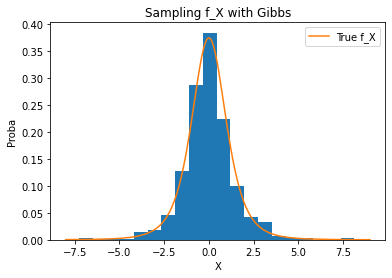

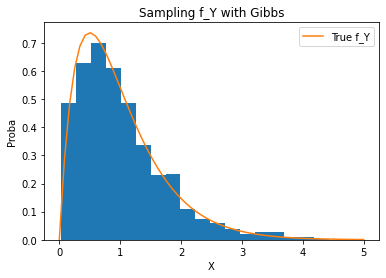

In [49]:
# Test
data = Gibbs_sampler(1000)

# print f_X
x_limp = ceil(np.max(data[:,0]))
x_limn = floor(np.min(data[:,0]))
plt.hist(data[:,0],density=True,bins=20)  
x = np.linspace(x_limn, x_limp , (abs(x_limn) + abs(x_limp) +1)*10)
plt.plot(x,f_X(x), label='True f_X')
plt.xlabel('X')
plt.ylabel('Proba')
plt.title('Sampling f_X with Gibbs')
plt.legend()
plt.show()

# print f_Y
y_limp = ceil(np.max(data[:,1]))
y_limn = floor(np.min(data[:,1]))
plt.hist(data[:,1],density=True, bins=20)  
y = np.linspace(-y_limn, y_limp , (abs(y_limn) + abs(y_limp) +1)*10)
plt.plot(y,f_Y(y), label='True f_Y')
plt.xlabel('X')
plt.ylabel('Proba')
plt.title('Sampling f_Y with Gibbs')
plt.legend()
plt.show()